In [18]:
import numpy as np
import pandas as pd

In [19]:
train_data = pd.read_csv("Datasets/Loan_Prediction_Train.csv")
test_data = pd.read_csv("Datasets/Loan_Prediction_Test.csv")

In [20]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
# Let check info data type of each features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [22]:
# check shape of dataset
train_data.shape

(614, 13)

In [23]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
# Property frequency table
train_data["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: >

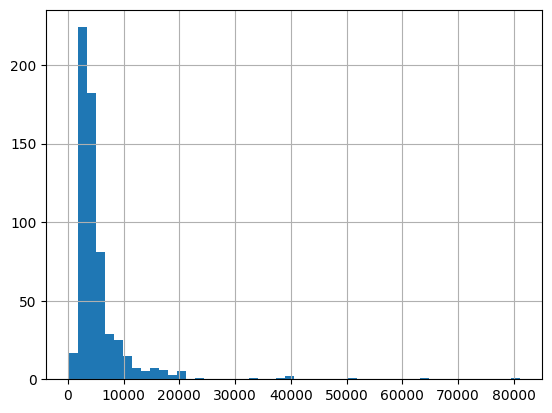

In [14]:
# let distribustion plot(histogram) for ApplicantIncome
train_data["ApplicantIncome"].hist(bins = 50)

<Axes: >

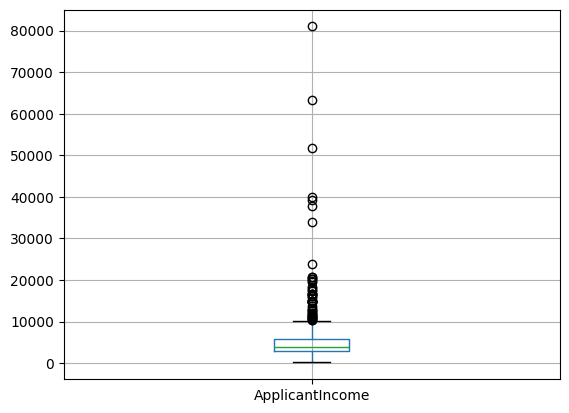

In [15]:
# let us create box plot for ApplicantIncome
train_data.boxplot(column = "ApplicantIncome")

<Axes: >

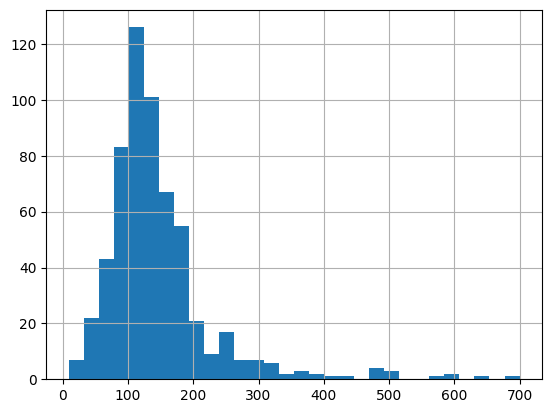

In [16]:
# Loan amount 
train_data["LoanAmount"].hist(bins = 30)

<Axes: >

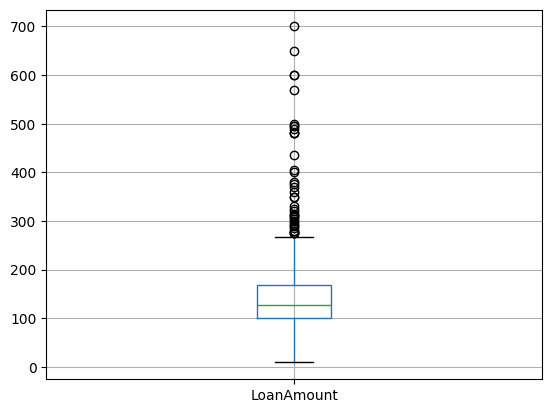

In [17]:
# there is positive skew in Loan Amount
train_data.boxplot(column = "LoanAmount")

In [13]:
# check null values in each columns
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
train_data.size  # size of each column

7982

In [31]:

((train_data.isnull().sum().sum())/train_data.size) *100   # the percentage of missing values in the train_data dataset

np.float64(1.8667000751691305)

In [32]:
# let remove Loan_ID as it is not important feature
train_data = train_data.drop("Loan_ID", axis = 1)

In [39]:
# We will separate the numerical columns from the categorical

cat_data = []
num_data = []

for i,j in enumerate(train_data.dtypes):
    if j == object:
        cat_data.append(train_data.iloc[:, i])
    else :
        num_data.append(train_data.iloc[:, i])

In [42]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [35]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [43]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [48]:
# cat_data.isnull().sum()   # to check the null values in the categorical data
# num_data.isnull().sum()   # to check the null values in the numerical data

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [49]:
# categorical_data
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))  # If you want to fill every column with its own most frequent value you can use
# cat_data

In [51]:
# numerical_data

columns = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]  # fill every missing value with their previous value in the same column
for col in columns:
    num_data[col].fillna(num_data[col].mean(), inplace=True)

/var/folders/dp/w9766y9x00j7vmxb8b37p1bc0000gp/T/ipykernel_36698/957298677.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  num_data[col].fillna(num_data[col].mean(), inplace=True)


In [53]:
from sklearn.preprocessing import LabelEncoder    #convertion of  categorical column into numerical column
label_encoder = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [23]:
# transform the target column

target_values = {'Y': 1 , 'N' : 0}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [24]:
# transform other columns

for i in cat_data:
    cat_data[i] = label_encoder.fit_transform(cat_data[i])

In [25]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [26]:
train_data= pd.concat([cat_data, num_data, target], axis=1)

In [27]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0,1


In [28]:
# i shuffled the data 
train_data=train_data.sample(frac=1)

<html>
    <h1 style="color:#52abec">Feature Engineering</h1>
</html>

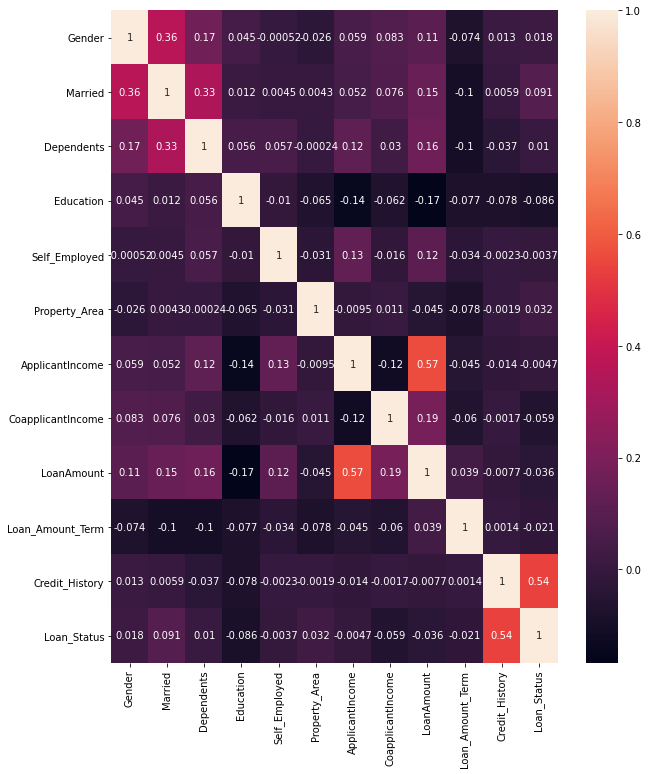

In [29]:
 # let us create correlation matirx
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [30]:
# as creadit history and married feature is important feature
# loan amount and applicant feature is highly correlated feature

In [31]:
# let create new feature total income
train_data["ratio_income"] = train_data["CoapplicantIncome"]/ train_data["ApplicantIncome"]

In [32]:
# let us drop ApplicantIncome and CoapplicantIncome
train_data = train_data.drop(["ApplicantIncome","CoapplicantIncome"],axis = 1)

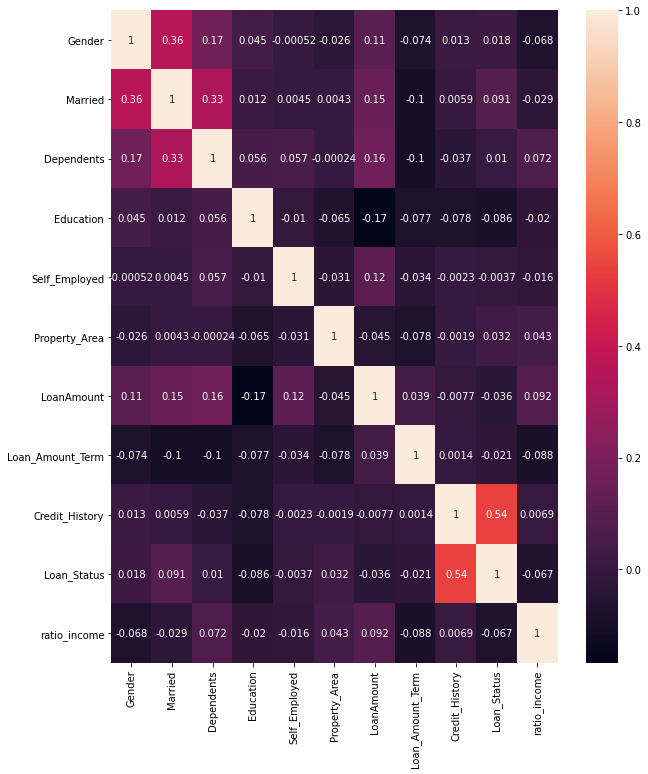

In [33]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [34]:
train_data["loan_per_term"] = train_data["LoanAmount"] * train_data["Loan_Amount_Term"]

In [35]:
# let us drop LoanAmount and Loan_Amount_Term
train_data = train_data.drop(["LoanAmount","Loan_Amount_Term"],axis = 1)

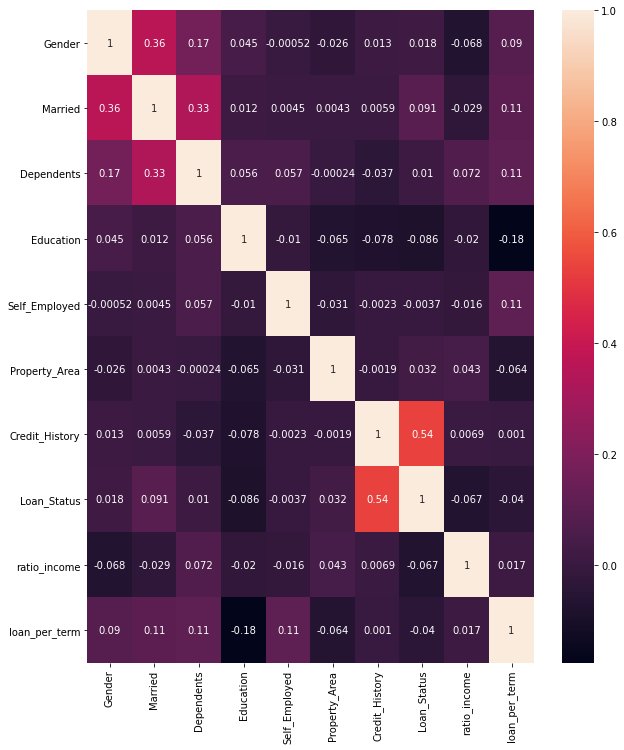

In [36]:
plt.figure(figsize = (10,12))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

In [37]:
# let check counts of every categorical column

for i in range(train_data.shape[1]):
    print(train_data.iloc[:,i].value_counts(), end='\n------------------------------------------------\n')

1    502
0    112
Name: Gender, dtype: int64
------------------------------------------------
1    401
0    213
Name: Married, dtype: int64
------------------------------------------------
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
------------------------------------------------
0    480
1    134
Name: Education, dtype: int64
------------------------------------------------
0    532
1     82
Name: Self_Employed, dtype: int64
------------------------------------------------
1    233
2    202
0    179
Name: Property_Area, dtype: int64
------------------------------------------------
1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64
------------------------------------------------
1    422
0    192
Name: Loan_Status, dtype: int64
------------------------------------------------
0.000000    273
0.565659      2
0.735294      2
0.983593      1
0.926731      1
           ... 
0.121338      1
0.558776      1
0.397873      1
0.725705    

<AxesSubplot:xlabel='loan_per_term', ylabel='Count'>

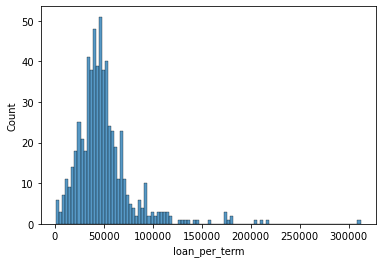

In [38]:
# let see histogram for loan_per_term

sns.histplot(train_data["loan_per_term"] , bins = 100)

<AxesSubplot:xlabel='loan_per_term', ylabel='Count'>

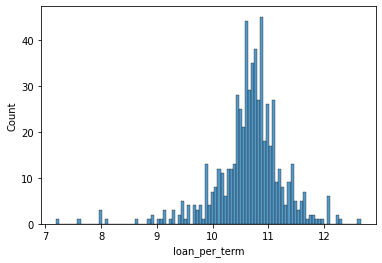

In [39]:
# loan_per _term is right skewed as shown here so let transfer to log
train_data["loan_per_term"]  = np.log(train_data["loan_per_term"])

# again histogram

sns.histplot(train_data["loan_per_term"] , bins = 100)

In [40]:
# for  ratio_income fearue 
train_data["ratio_income"].value_counts()

0.000000    273
0.565659      2
0.735294      2
0.983593      1
0.926731      1
           ... 
0.121338      1
0.558776      1
0.397873      1
0.725705      1
0.283620      1
Name: ratio_income, Length: 340, dtype: int64

In [41]:
# there is most of value is 0 so let try to change others to 1 ( roundup)
train_data['ratio_income'] = [x if x==0 else 1 for x in train_data['ratio_income']]
print('-'*50)
print('\nafter:')
print(train_data['ratio_income'].value_counts())

--------------------------------------------------

after:
1.0    341
0.0    273
Name: ratio_income, dtype: int64


In [42]:
# now it's look good for ratio_income

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


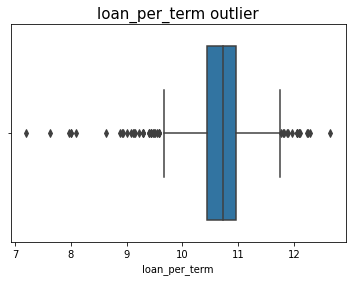

In [43]:
# we will treat outliers for some features
sns.boxplot(train_data["loan_per_term"])
plt.title("loan_per_term outlier",fontsize = 15)

plt.show()

In [44]:
# # this number is hyper parameter , as much as you reduce it, as much as you remove more points. you can try differnet value
threshold = 1.5  
loan_per_term_out = train_data['loan_per_term']
q25, q75 = np.percentile(loan_per_term_out, 25), np.percentile(loan_per_term_out, 75) # Q25, Q75
print('Quartile 25: {} , Quartile 75: {}'.format(q25, q75))

iqr = q75 - q25
print('iqr: {}'.format(iqr))

cut = iqr * threshold
lower, upper = q25 - cut, q75 + cut
print('Cut Off: {}'.format(cut))
print('Lower: {}'.format(lower))
print('Upper: {}'.format(upper))

outliers = [x for x in loan_per_term_out if x < lower or x > upper]
print('Nubers of Outliers: {}'.format(len(outliers)))
print('outliers:{}'.format(outliers))

train_data = train_data.drop(train_data[(train_data['loan_per_term'] > upper) | (train_data['loan_per_term'] < lower)].index)

print('len X_train before dropping the outliers', len(train_data))

Quartile 25: 10.439980923050696 , Quartile 75: 10.961277846683982
iqr: 0.5212969236332867
Cut Off: 0.7819453854499301
Lower: 9.658035537600766
Upper: 11.743223232133913
Nubers of Outliers: 47
outliers:[8.006367567650246, 9.144200569471638, 9.287301413112312, 7.965545573129992, 9.469622969906265, 9.441452092939569, 11.96374627479919, 8.626944055375356, 12.090661794018846, 8.922658299524402, 12.059890135352092, 9.392661928770137, 8.930626469173578, 11.81569317484005, 9.587406005562649, 12.100712129872347, 12.092679958175083, 12.283033686666302, 12.65075846679162, 7.620705086838262, 8.006367567650246, 11.799607037088427, 9.441452092939569, 9.51044496442652, 8.881836305004146, 12.059890135352092, 9.574983485564092, 12.231740392278752, 9.112948025967533, 8.083328608786376, 9.549665677579801, 9.578311275656766, 9.084777149000837, 12.254862809699606, 11.889991098556695, 9.287301413112312, 9.287301413112312, 9.441452092939569, 9.21830854162536, 9.400630098419315, 12.059890135352092, 9.48341629

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


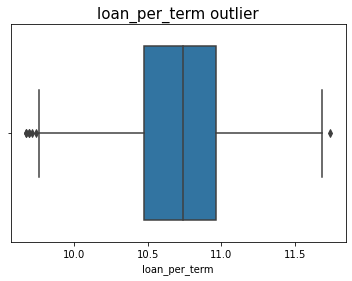

In [45]:
sns.boxplot(train_data["loan_per_term"])
plt.title("loan_per_term outlier",fontsize = 15)

plt.show()

# it looks good now

<html>
    <h1 style="color:#52abec">Feature selection</h1>
</html>

<AxesSubplot:>

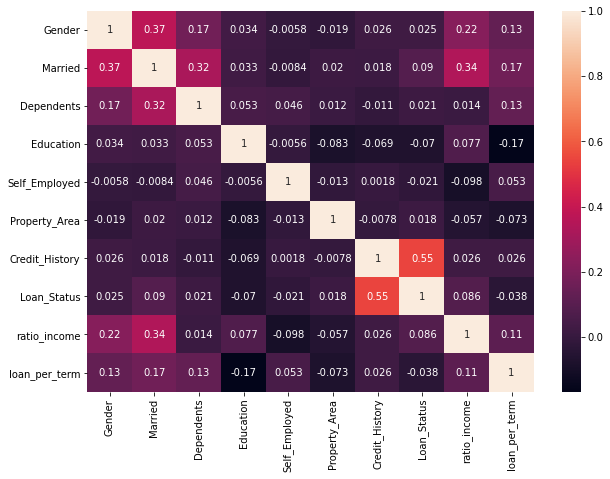

In [46]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True)

In [48]:
# self employed has very bad correlation matrix let's drop that column
train_data = train_data.drop("Self_Employed",axis = 1)

<AxesSubplot:>

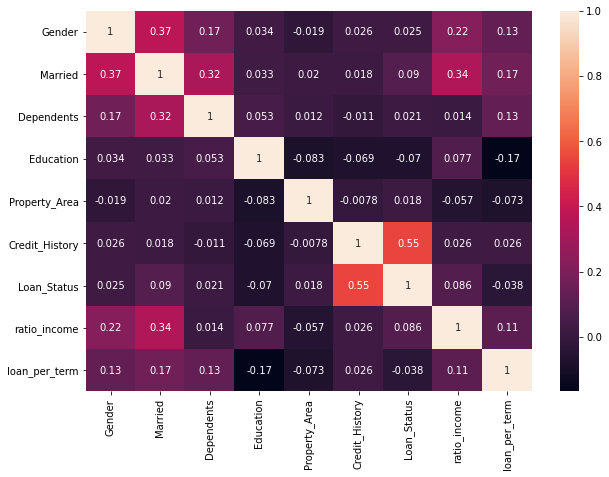

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(), annot=True)

<html>
    <h1 style="color:#52abec">Let us prepair Train and test data for model</h1>
</html>

In [50]:
Y = train_data["Loan_Status"]
X = train_data.drop("Loan_Status",axis = 1)

In [51]:
# Standarize data
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()
X = slc.fit_transform(X)

<html>
    <h1 style="color:#52abec">Logistic Regression</h1>
</html>

In [52]:
# let us create Logistic regression

from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state = 42)


In [53]:
logistic_model.fit(X,Y)

LogisticRegression(random_state=42)

In [54]:
# PREDICITING FROM THE MODEL
y_pred_logistic = logistic_model.predict(X)
y_pred_logistic

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [55]:
# ACCURACY
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("ACCURACY of logistic model is:", accuracy_score(Y, y_pred_logistic))

ACCURACY of logistic model is: 0.8112874779541446


In [56]:
# let us check classification report
print(classification_report(Y, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       177
           1       0.79      0.98      0.88       390

    accuracy                           0.81       567
   macro avg       0.85      0.71      0.73       567
weighted avg       0.83      0.81      0.79       567



<AxesSubplot:>

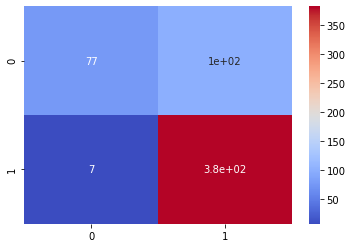

In [57]:
# let us check confusion matrix
cf_matrix = confusion_matrix(Y, y_pred_logistic)
sns.heatmap(cf_matrix, annot=True,cmap="coolwarm")

<html>
    <h1 style="color:#52abec">Hyperparameter tuning for Logistic Regression</h1>
</html>

In [58]:
# Hyper Parameters tuinning

penalty = ["l1", "l2"]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
c = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [59]:
hyper_param = []
f1_scores = []

lgr_best_score = 0
lgr_best_solver = str
lgr_best_c = 0
lgr_best_penalty = str
kFolds = 5

In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

for s in range(len(solver)) :
    for p in range(len(penalty)) :
        for  C in range(len(c)):
            if solver[s] == "newton-cg" or "lbfgs" :
                
                if penalty[p] != "l1" :
                
                    
                    lgr = LogisticRegression(penalty = penalty[p], C = c[C], solver = solver[s], max_iter = 100)
                    y_pred = cross_val_predict(lgr, X, Y, cv = kFolds)
                    F1_score = f1_score(Y, y_pred)
                    c_matrix = confusion_matrix(Y, y_pred)
                    hyper_param.append([solver[s], penalty[p], c[C]])
                    f1_scores.append(F1_score)
                    
                    if F1_score >= lgr_best_score :
                        lgr_best_score = F1_score
                        lgr_best_solver = solver[s]
                        lgr_best_c = c[C]
                        lgr_best_penalty = penalty[p]
                
            
            else :
                
                lgr = LogisticRegression(penalty = penalty[p], C = c[C], solver = solver[s], max_iter = 100)
                y_pred = cross_val_predict(lgr, X, Y, cv = kFolds)
                F1_score = f1_score(Y, y_pred)
                c_matrix = confusion_matrix(Y, y_pred)
                hyper_param.append([solver[s], penalty[p], c[C]])
                f1_scores.append(F1_score)
                    
                if F1_score >= lgr_best_score :
                    lgr_best_score = F1_score
                    lgr_best_solver = solver[s]
                    lgr_best_c = c[C]
                    lgr_best_penalty = penalty[p]

In [61]:
hyper_param

[['newton-cg', 'l2', 0.0001],
 ['newton-cg', 'l2', 0.001],
 ['newton-cg', 'l2', 0.01],
 ['newton-cg', 'l2', 0.1],
 ['newton-cg', 'l2', 1],
 ['newton-cg', 'l2', 10],
 ['newton-cg', 'l2', 100],
 ['lbfgs', 'l2', 0.0001],
 ['lbfgs', 'l2', 0.001],
 ['lbfgs', 'l2', 0.01],
 ['lbfgs', 'l2', 0.1],
 ['lbfgs', 'l2', 1],
 ['lbfgs', 'l2', 10],
 ['lbfgs', 'l2', 100],
 ['liblinear', 'l2', 0.0001],
 ['liblinear', 'l2', 0.001],
 ['liblinear', 'l2', 0.01],
 ['liblinear', 'l2', 0.1],
 ['liblinear', 'l2', 1],
 ['liblinear', 'l2', 10],
 ['liblinear', 'l2', 100],
 ['sag', 'l2', 0.0001],
 ['sag', 'l2', 0.001],
 ['sag', 'l2', 0.01],
 ['sag', 'l2', 0.1],
 ['sag', 'l2', 1],
 ['sag', 'l2', 10],
 ['sag', 'l2', 100],
 ['saga', 'l2', 0.0001],
 ['saga', 'l2', 0.001],
 ['saga', 'l2', 0.01],
 ['saga', 'l2', 0.1],
 ['saga', 'l2', 1],
 ['saga', 'l2', 10],
 ['saga', 'l2', 100]]

In [62]:
f1_scores

[0.8150470219435736,
 0.8150470219435736,
 0.877434135166094,
 0.877434135166094,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257,
 0.8150470219435736,
 0.8150470219435736,
 0.877434135166094,
 0.877434135166094,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257,
 0.877434135166094,
 0.877434135166094,
 0.877434135166094,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257,
 0.8150470219435736,
 0.8150470219435736,
 0.877434135166094,
 0.877434135166094,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257,
 0.8150470219435736,
 0.8150470219435736,
 0.877434135166094,
 0.877434135166094,
 0.8761467889908257,
 0.8761467889908257,
 0.8761467889908257]

In [63]:
max_f1_score_index = f1_scores.index(max(f1_scores))
max_f1_score_index

2

In [64]:
# best f1 score
lgr_best_score

0.877434135166094

In [65]:
hyper_param[3]

['newton-cg', 'l2', 0.1]

In [66]:
best_lgr = LogisticRegression(penalty = "l2", C = 0.1, solver = "newton-cg", max_iter = 100)
best_lgr.fit(X, Y)

LogisticRegression(C=0.1, solver='newton-cg')

In [67]:
# prediction
y_train_pred = best_lgr.predict(X)

In [68]:
# score
scores = f1_score(Y, y_train_pred)

In [69]:
scores

0.877434135166094

In [70]:
# let us check classification report
print(classification_report(Y, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       177
           1       0.79      0.98      0.88       390

    accuracy                           0.81       567
   macro avg       0.85      0.71      0.73       567
weighted avg       0.83      0.81      0.79       567



<AxesSubplot:>

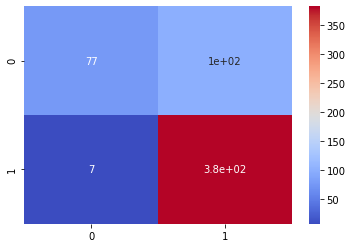

In [71]:
# let us check confusion matrix
cf_matrix = confusion_matrix(Y, y_train_pred)
sns.heatmap(cf_matrix, annot=True,cmap="coolwarm")

<html>
    <h1 style="color:#52abec">RandomForest Classifier</h1>
</html>

In [69]:
# let us train model using random forest
from sklearn.ensemble import RandomForestClassifier

In [70]:
random_forest_model = RandomForestClassifier(n_estimators=100)

In [71]:
random_forest_model.fit(X, Y)

RandomForestClassifier()

In [72]:
# PREDICITING FROM THE MODEL
y_pred_rf = random_forest_model.predict(X)

In [73]:
# accuracy
print("ACCURACY of random forest model is:", accuracy_score(Y, y_pred_rf))

ACCURACY of random forest model is: 1.0


<html>
    <h1 style="color:#52abec">Hyperparameter tunig for RandomForest Model using GridSearchCV</h1>
</html>

In [74]:
# hyper parameter tunning
# IMPORTING Libraries
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [75]:
# GETTING PARAMETERS DICTIONARY
params_grid = {
    "n_estimators" : [100,200,300,400,500],
    "max_depth": [1,2,3,4,5],
    "min_samples_leaf" : [1,2,3,4,5],
    "bootstrap" : [True,False],
    }

In [76]:
# RANDOM FOREST CLASSIFIER INSTANCE
clf = RandomForestClassifier()
grid_search_cv = GridSearchCV(clf,params_grid,cv=5)
grid_search_cv.fit(X,Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [77]:
# GETTING BEST ESTIMATOR
grid_search_cv.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=200)

In [78]:
random_forest_model = RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=200)

# fitting the model
random_forest_model.fit(X,Y)

RandomForestClassifier(bootstrap=False, max_depth=5, n_estimators=200)

In [79]:
# PRedicitng from the model
y_pred_rf = random_forest_model.predict(X)

In [80]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_rf))

Accuracy: 0.8289241622574955


<html>
    <h1 style="color:#52abec">Hyperparameter tunig for RandomForest Model using RandomSearchCV</h1>
</html>

In [ ]:
random_search_cv = RandomizedSearchCV(clf,params_grid,cv=5)
random_search_cv.fit(X,Y)

In [ ]:
random_search_cv.best_estimator_

In [ ]:
random_forest_model_rf = RandomForestClassifier(bootstrap=False, max_depth=2, n_estimators=400)

# fitting the model
random_forest_model_rf.fit(X,Y)

In [ ]:
# PRedicitng from the model
y_pred_rf_rs = random_forest_model_rf.predict(X)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_rf_rs))

<html>
    <h1 style="color:#52abec">Support vector machine Model</h1>
</html>

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC(kernel = "linear")

In [ ]:
svc_model.fit(X,Y)

In [ ]:
# Predicitng from the model
y_pred_svc = svc_model.predict(X)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_svc))

<html>
    <h1 style="color:#52abec">Hyperparameter tunig for Support vector machine Model</h1>
</html>

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
             }

In [ ]:
best_svc_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [ ]:
best_svc_model.fit(X, Y)

In [ ]:
# print best parameter after tuning
print(best_svc_model.best_estimator_)

In [ ]:
best_svc_model = SVC(C=0.1, gamma=1, kernel='linear')

best_svc_model.fit(X, Y)

In [ ]:
# Predicitng from the model
y_pred_svc_best = svc_model.predict(X)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_svc_best))

<html>
    <h1 style="color:#52abec">Adaboost Classifier Model</h1>
</html>

In [ ]:
# import library
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_boost_model = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.1)

In [ ]:
ada_boost_model.fit(X, Y)

In [ ]:
# Predicitng from the model
y_pred_ada_boost = svc_model.predict(X)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_ada_boost))

<html>
    <h1 style="color:#52abec">XGboost Classifier Model</h1>
</html>

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)

In [ ]:
xgb_cv.fit(X, Y)

In [ ]:
# Predicitng from the model
y_pred_xgb = svc_model.predict(X)

In [ ]:
# Accuracy
print("Accuracy:",accuracy_score(Y, y_pred_xgb))

<html>
    <h1 style="color:#52abec">Ensemable Model</h1>
</html>

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators =500, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)

In [73]:
from xgboost.sklearn import XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)


In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

In [75]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='hard')

In [76]:
eclf.fit(X, Y)

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=500,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=0....
                                            max_delta_step=None, max_depth

<html>
    <h1 style="color:#52abec">Prepare Test Dataset</h1>
</html>

In [77]:
# let us prepare test data
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [78]:
cat_data_test = []
num_data_test = []

for i,c in enumerate(test_data.dtypes):
    if c == object:
        cat_data_test.append(test_data.iloc[:, i])
    else :
        num_data_test.append(test_data.iloc[:, i])

In [79]:
cat_data_test = pd.DataFrame(cat_data_test).transpose()
num_data_test = pd.DataFrame(num_data_test).transpose()

In [80]:
# cat_data
# If you want to fill every column with its own most frequent value you can use

cat_data_test = cat_data_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [81]:
# num_data
# fill every missing value with their previous value in the same column

num_data_test.fillna(method='bfill', inplace=True)

In [82]:
num_data_test["ratio_income"] = num_data_test["CoapplicantIncome"]/ num_data_test["ApplicantIncome"]

In [83]:
num_data_test["loan_per_term"] = num_data_test["LoanAmount"] * num_data_test["Loan_Amount_Term"]

In [84]:
num_data_test = num_data_test.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis = 1)
num_data_test.head()

,Credit_History,ratio_income,loan_per_term
0,1.0,0.000000,39600.0
1,1.0,0.487646,45360.0
2,1.0,0.360000,74880.0
3,1.0,1.088034,36000.0
4,1.0,0.000000,28080.0


In [85]:
cat_data_test = cat_data_test.drop("Self_Employed",axis = 1)
cat_data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Property_Area
0,LP001015,Male,Yes,0,Graduate,Urban
1,LP001022,Male,Yes,1,Graduate,Urban
2,LP001031,Male,Yes,2,Graduate,Urban
3,LP001035,Male,Yes,2,Graduate,Urban
4,LP001051,Male,No,0,Not Graduate,Urban


In [86]:
num_data_test["loan_per_term"]  = np.log(num_data_test["loan_per_term"])

In [87]:
num_data_test.head()

,Credit_History,ratio_income,loan_per_term
0,1.0,0.000000,10.586584
1,1.0,0.487646,10.722386
2,1.0,0.360000,11.223642
3,1.0,1.088034,10.491274
4,1.0,0.000000,10.242813


In [88]:
# there is most of value is 0 so let try to change others to 1 ( roundup)
num_data_test['ratio_income'] = [x if x==0 else 1 for x in num_data_test['ratio_income']]
print('-'*50)
print('\nafter:')
print(num_data_test['ratio_income'].value_counts())

--------------------------------------------------

after:
1.0    211
0.0    156
Name: ratio_income, dtype: int64


In [89]:
# transform other columns
for i in cat_data_test:
    if  i == "Loan_ID" :
        pass
    else :
        cat_data_test[i] = label_encoder.fit_transform(cat_data_test[i])

In [90]:
cat_data_test

,Loan_ID,Gender,Married,Dependents,Education,Property_Area
0,LP001015,1,1,0,0,2
1,LP001022,1,1,1,0,2
2,LP001031,1,1,2,0,2
3,LP001035,1,1,2,0,2
4,LP001051,1,0,0,1,2
...,...,...,...,...,...,...
362,LP002971,1,1,3,1,2
363,LP002975,1,1,0,0,2
364,LP002980,1,0,0,0,1
365,LP002986,1,1,0,0,0


In [91]:
test_data= pd.concat([cat_data_test, num_data_test], axis=1)

In [92]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Property_Area,Credit_History,ratio_income,loan_per_term
0,LP001015,1,1,0,0,2,1.0,0.0,10.586584
1,LP001022,1,1,1,0,2,1.0,1.0,10.722386
2,LP001031,1,1,2,0,2,1.0,1.0,11.223642
3,LP001035,1,1,2,0,2,1.0,1.0,10.491274
4,LP001051,1,0,0,1,2,1.0,0.0,10.242813


In [93]:
test_data.isna().sum()

Loan_ID           0
Gender            0
Married           0
Dependents        0
Education         0
Property_Area     0
Credit_History    0
ratio_income      0
loan_per_term     0
dtype: int64

In [94]:
X_test = test_data.drop("Loan_ID",axis = 1)

In [95]:
X_test = slc.transform(X_test)

<html>
    <h1 style="color:#52abec">Predict For Test Dataset using Diffrent Model</h1>
</html>

In [ ]:
# PREDICITING FROM THE differnet MODELs
#models = [best_lgr,random_forest_model_rf,ada_boost_model]
models = [best_lgr]

for model in models:
    test_data_copy = test_data.copy()
    test_data_copy["Loan_Status"] = model.predict(X_test)
    test_data_copy = test_data_copy[["Loan_ID","Loan_Status"]]
    test_data_copy["Loan_Status"] =  test_data_copy["Loan_Status"].map({0:"N",1:"Y"})
    test_data_copy.to_csv("loan_prediction_"+str(model)+".csv")

In [ ]:
# PREDICITING FROM THE MODEL
test_data["Loan_Status"] = logistic_model.predict(X_test)

In [ ]:
test_data_write = test_data[["Loan_ID","Loan_Status"]]
test_data_write["Loan_Status"] = test_data_write["Loan_Status"].map({0:"N",1:"Y"})

In [ ]:
test_data

In [ ]:
test_data_write.to_csv("loan_prediction.csv")

In [ ]:
test_data["Loan_Status_rf"] = logistic_model.predict(X_test)
test_data_write = test_data[["Loan_ID","Loan_Status_rf"]]
test_data_write["Loan_Status_rf"] = test_data_write["Loan_Status_rf"].map({0:"N",1:"Y"})

In [ ]:
test_data_write

In [ ]:
test_data_write.to_csv("loan_prediction_rf.csv")

In [96]:
# predict for ensemnle model created

y_test_pred = eclf.predict(X_test)

In [97]:
test_data["Loan_Status"] = y_test_pred

In [109]:
test_final = test_data.drop(['Gender', 'Married', 'Dependents', 'Education', 'Credit_History', 'Property_Area'], axis=1,inplace = True)

In [110]:
test_final =  test_data.drop(["ratio_income","loan_per_term"],axis = 1)

In [111]:
test_final

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [112]:
test_final['Loan_Status'] = test_final['Loan_Status'].map({0:'N', 1:'Y'})

In [113]:
test_final.to_csv('ensmeble_model_prediction.csv', index=False)

In [114]:
test_final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
